<a href="https://colab.research.google.com/github/ADEELYASIR/ADEELYASIR/blob/main/ML_for_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date,time
# install yahoo Finance Liberies
!pip install -q yfinance
!pip install -q yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
import warnings
warnings.filterwarnings("ignore")



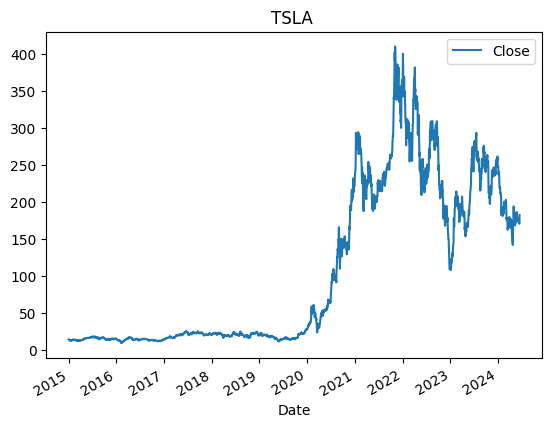

In [35]:
# Downloaded our historical data
df = yf.download(tickers = "TSLA",

                   start= "2015-01-01",
                   end= date.today(),
                   progress= False)
# create a simple charts
df.plot(y= "Close", title = "TSLA ")
plt.show()


creating a Techincale indicators and we are going to plot them

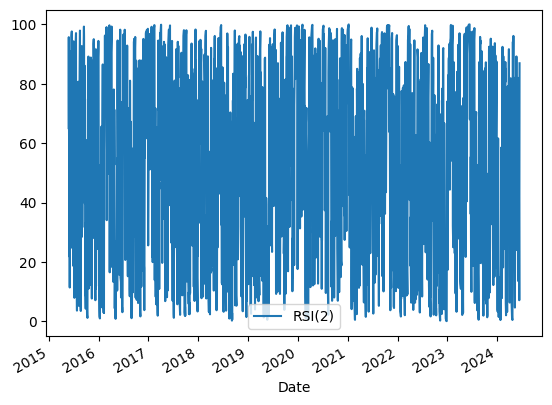

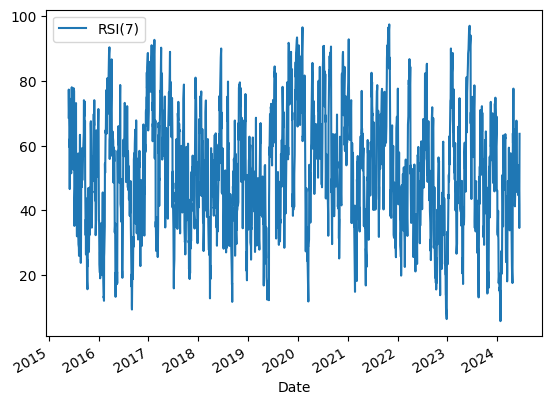

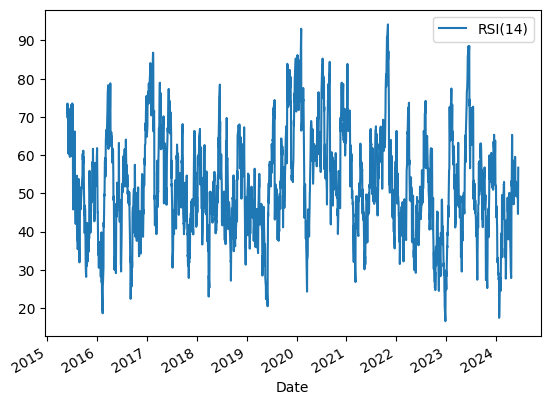

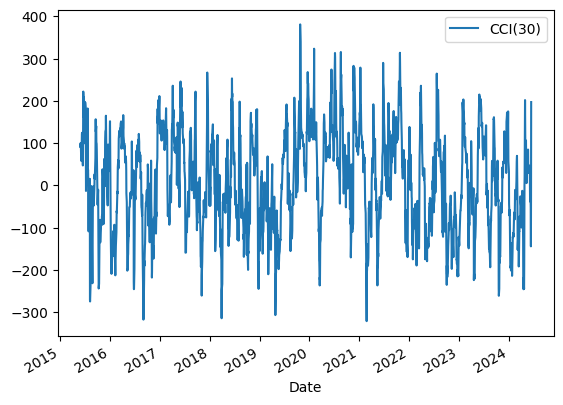

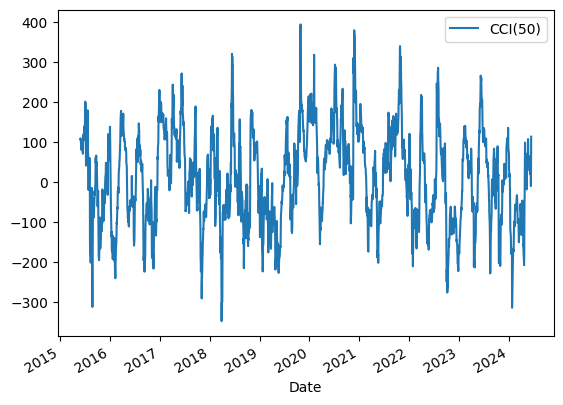

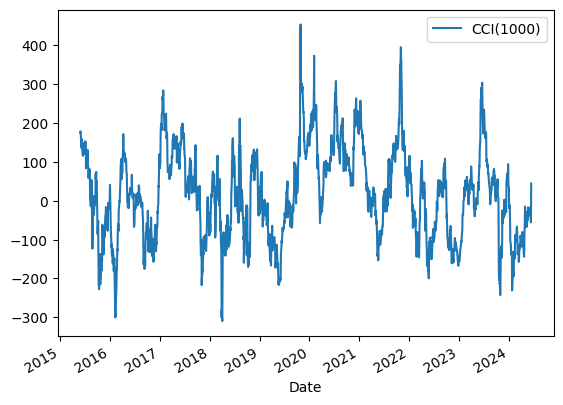

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(1000)
Date,,,,,,,,,,,,
2015-05-27,16.567333,16.633333,16.370001,16.495333,16.495333,51123000,65.059777,68.674343,70.012578,91.392133,106.845427,175.921008
2015-05-28,16.468666,16.786667,16.336666,16.763332,16.763332,54709500,95.698686,77.316151,73.488255,96.249598,108.826492,178.693115
2015-05-29,16.733334,16.858000,16.628668,16.719999,16.719999,56839500,74.556564,73.491654,72.034436,99.815519,109.327495,177.916923
2015-06-01,16.760668,16.773333,16.497999,16.629999,16.629999,37576500,38.878296,65.625743,68.982067,86.144734,99.462561,163.863061
2015-06-02,16.594667,16.626667,16.420000,16.556667,16.556667,32022000,21.843886,59.565349,66.509135,72.750773,90.523413,151.170046


In [36]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta
df['RSI(2)'] = ta.rsi(df['Close'], length=2)
df['RSI(7)'] = ta.rsi(df['Close'], length = 7)
df['RSI(14)'] = ta.rsi(df['Close'], length = 14)
df['CCI(30)'] = ta.cci(close = df['Close'], length = 30, high= df['High'], low = df['Low'])
df['CCI(50)'] = ta.cci(close = df['Close'], length = 50, high= df['High'], low = df['Low'])
df['CCI(1000)'] = ta.cci(close = df['Close'], length = 100, high= df['High'], low = df['Low'])
# Drop NaN values.
df = df.dropna()
# creating a plot showing some of our indicator
df.plot(y= 'RSI(2)')
df.plot(y= 'RSI(7)')
df.plot(y= 'RSI(14)')
df.plot(y= 'CCI(30)')
df.plot(y= 'CCI(50)')
df.plot(y= 'CCI(1000)')
plt.show()
# How our current Datafram going
df.head()

Preparing our data labelling
What do we want to do over here?
When we place our trade : Buy at Open (Over Next day).
we want to close our trade : at the next day Open
Formula:
Handing the return this ways: Buy Open(-1) - closing: Open(-2)
we want to label our data on following days-
BUT SIGNAL : Open(-2) > Open(-1)
SELL SIGNAL : Open(-2) < Open(-1)
indicators the current situations, and our label take a look ahead of time to determine if we have a pettren

In [37]:
df['LABEL'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)), '1','0')
df = df.dropna()
df.head()


,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(1000),LABEL
Date,,,,,,,,,,,,,
2015-05-27,16.567333,16.633333,16.370001,16.495333,16.495333,51123000,65.059777,68.674343,70.012578,91.392133,106.845427,175.921008,1
2015-05-28,16.468666,16.786667,16.336666,16.763332,16.763332,54709500,95.698686,77.316151,73.488255,96.249598,108.826492,178.693115,1
2015-05-29,16.733334,16.858000,16.628668,16.719999,16.719999,56839500,74.556564,73.491654,72.034436,99.815519,109.327495,177.916923,0
2015-06-01,16.760668,16.773333,16.497999,16.629999,16.629999,37576500,38.878296,65.625743,68.982067,86.144734,99.462561,163.863061,0
2015-06-02,16.594667,16.626667,16.420000,16.556667,16.556667,32022000,21.843886,59.565349,66.509135,72.750773,90.523413,151.170046,0


Creating the Neural Netwrok
SKlean

In [38]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# Fitting  - indicators and our labellings
X = df[df.columns[6:-1]].values
y = df['LABEL'].values
# Train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes= (8,8,8), activation = 'relu', solver = 'adam', max_iter = 1000)
mlp.fit(X_train, y_train)
prediction_test = mlp.predict(X_test)
prediction_train = mlp.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
print('Test Data Accuracy')
print(classification_report(y_test, prediction_test))
print('Train Data Accuracy')
print(classification_report(y_train, prediction_train))




Test Data Accuracy
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       331
           1       0.50      0.60      0.55       353

    accuracy                           0.48       684
   macro avg       0.48      0.48      0.47       684
weighted avg       0.48      0.48      0.48       684

Train Data Accuracy
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       785
           1       0.55      0.66      0.60       810

    accuracy                           0.55      1595
   macro avg       0.55      0.55      0.54      1595
weighted avg       0.55      0.55      0.54      1595



Backtesting the Model
Measure the return obtained by trading our model

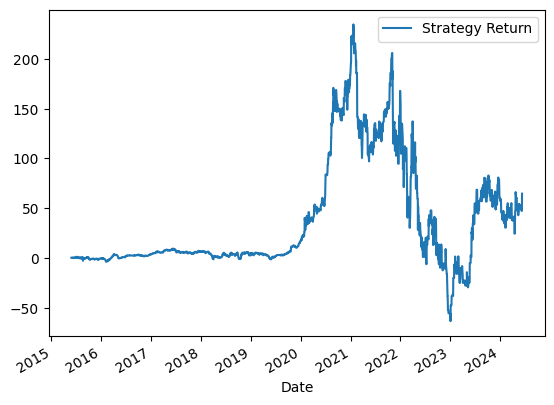

In [39]:
df['predictions'] = np.append(prediction_test, prediction_train)
df['Strategy Return'] = np.where(df['predictions'].eq('1'), df['Open'].shift(-2)-df['Open'].shift(-1),0)
df['Strategy Return'] = df['Strategy Return'].cumsum()
df.plot(y= 'Strategy Return')
plt.show()

In [40]:
prediction = df.iloc[-1]['predictions']
if prediction == '1':
  print("Today return forcast: UP")
else:
  print("Today return forcast: Down")

Today return forcast: Down
